In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,College level,standard,none,72,72,74.0
1,female,NaN,College level,standard,completed,69,90,88.0
2,female,group B,College level,standard,none,90,95,93.0
3,male,group A,College level,free/reduced,none,47,57,44.0
4,male,NaN,College level,standard,none,76,78,75.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       986 non-null    object 
 1   race/ethnicity               279 non-null    object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                990 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.isnull().sum()

gender                          14
race/ethnicity                 721
parental level of education      0
lunch                            0
test preparation course          0
math score                       0
reading score                    0
writing score                   10
dtype: int64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,990.000000
mean,66.08900,69.169000,68.093939
std,15.16308,14.600192,15.231621
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,58.000000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
mode_genre = df['gender'].mode()[0]#rellenar los valores nulos de genero

In [9]:
df['gender'].fillna(mode_genre,inplace=True)

In [10]:
mode_race = df['race/ethnicity'].mode()[0]#rellenar los valores nulos de raza

In [11]:
df['race/ethnicity'].fillna(mode_race,inplace=True)

In [12]:
mean_writing = df['writing score'].mean()#rellenar los valores nulos de writing score

In [13]:
df['writing score'].fillna(mean_writing,inplace=True)

In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**GENERO**

In [15]:
df['gender'].value_counts()

female    523
male      477
Name: gender, dtype: int64

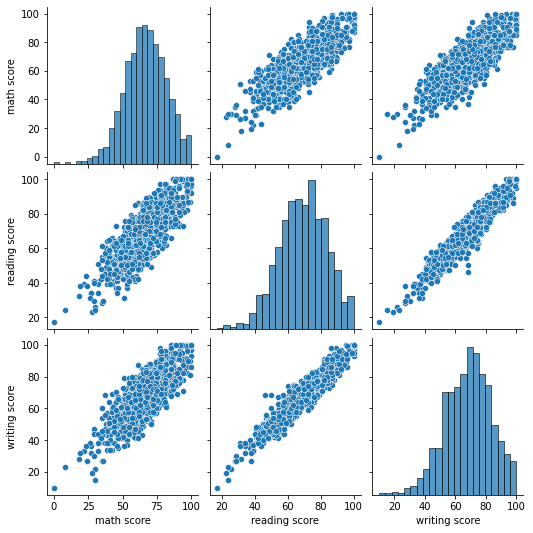

In [16]:
sns.pairplot(df)

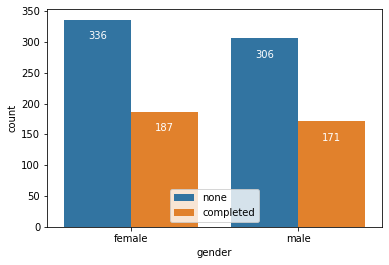

In [39]:
#sns.countplot(x='gender',data=df,hue = 'test preparation course')

ax = sns.countplot(x='gender', hue='test preparation course', data=df)
ax.legend(loc='lower center')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

**raza**

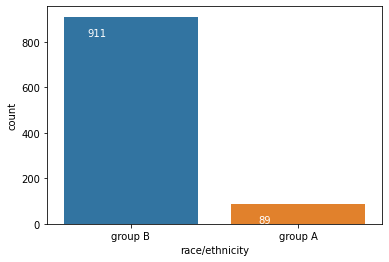

In [45]:
 #sns.displot(df['race/ethnicity'],bins=20)


ax = sns.countplot(x='race/ethnicity', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

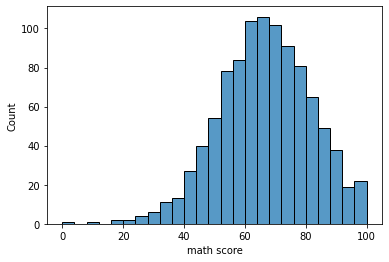

In [19]:
sns.histplot(data=df, x="math score")

**Performance**

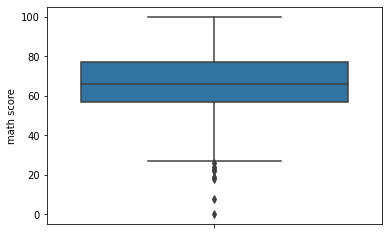

In [ ]:
sns.boxplot(y='math score',data=df)

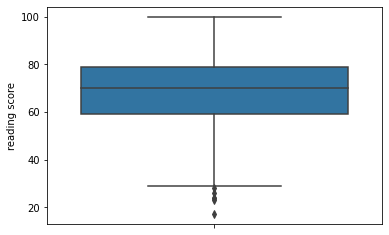

In [ ]:
sns.boxplot(y='reading score',data=df)

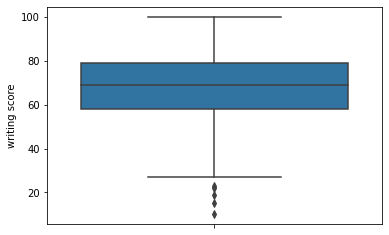

In [ ]:
sns.boxplot(y='writing score',data=df)

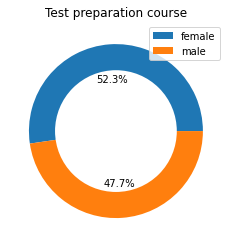

In [64]:
 
gender_agg=df.groupby('gender').count()['test preparation course'].reset_index().copy()
gender_agg
# grafico de torta
plt.pie(gender_agg['test preparation course'],autopct='%.1f%%')
  
# dibujamos un circulo
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# añadimos un circulo al grafico de tortas para convertirlo en anillo
fig.gca().add_artist(centre_circle)
  
# titulo
plt.title('Test preparation course')
  
# labels
plt.legend(labels = gender_agg['gender'], loc="upper right")
  

plt.show()

**MINERIA DE DATOS**

Prediccion #1

In [65]:
X = df[['reading score']] 
y = df['math score']



df2 =  df[['math score','reading score']].copy()
#vamos a analizar si hay alguna correlacion entre el puntaje de matematicas
#con el resultado del puntaje de lectura
df2

,math score,reading score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78
...,...,...
995,88,99
996,62,55
997,59,71
998,68,78


In [25]:
from sklearn.linear_model import LinearRegression

In [ ]:
regresion_lineal = LinearRegression()

In [ ]:
regresion_lineal.fit(X,y)

LinearRegression()

In [ ]:
predicciones = regresion_lineal.predict(X)
df2['Predicciones']=predicciones

In [ ]:
df2
#se escogio una regresion lineal en este caso
#porque priemro las unicas columnas numericas son las de score
#y ademas, estamso solamente comparando en este caso lectura con matematicas

,math score,reading score,Predicciones
0,72,72,68.492803
1,69,90,83.776606
2,90,95,88.022107
3,47,57,55.756300
4,76,78,73.587404
...,...,...,...
995,88,99,91.418508
996,62,55,54.058099
997,59,71,67.643702
998,68,78,73.587404


Prediccion #2

In [69]:
X = df[['reading score']] 
y = df['writing score']



df2 =  df[['writing score','reading score']].copy()
#vamos a analizar si hay alguna correlacion entre el puntaje de lectura
#con el resultado del puntaje de escritura
df2

,writing score,reading score
0,74.0,72
1,88.0,90
2,93.0,95
3,44.0,57
4,75.0,78
...,...,...
995,95.0,99
996,55.0,55
997,65.0,71
998,77.0,78


In [70]:
regresion_lineal = LinearRegression()

In [71]:
regresion_lineal.fit(X,y)

LinearRegression()

In [72]:
predicciones = regresion_lineal.predict(X)
df2['Predicciones']=predicciones

In [73]:
df2

,writing score,reading score,Predicciones
0,74.0,72,70.891172
1,88.0,90,88.676470
2,93.0,95,93.616830
3,44.0,57,56.070090
4,75.0,78,76.819604
...,...,...,...
995,95.0,99,97.569119
996,55.0,55,54.093946
997,65.0,71,69.903099
998,77.0,78,76.819604


In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,College level,standard,none,72,72,74.0
1,female,group B,College level,standard,completed,69,90,88.0
2,female,group B,College level,standard,none,90,95,93.0
3,male,group A,College level,free/reduced,none,47,57,44.0
4,male,group B,College level,standard,none,76,78,75.0
...,...,...,...,...,...,...,...,...
995,female,group B,College level,standard,completed,88,99,95.0
996,male,group B,High school level,free/reduced,none,62,55,55.0
997,female,group B,High school level,free/reduced,completed,59,71,65.0
998,female,group B,College level,standard,completed,68,78,77.0
